# Graded  Index Logarithmic Fibres 

Graded index fibres can easily be simulated with philsol. There are lots of different types of graded index fibres but one with particularly interesting properties is the logarithmic fibre. 

For more info see the paper by Harrington et al. 

https://www.osapublishing.org/optica/abstract.cfm?uri=optica-4-12-1526


Rather than constructing a waveguide with a step-like refractive index, light is confined by a potential which is changing with a contineous radial function given:
$$
n^2(r) = n_0^2 - NA^2 ln(\frac{r}{\rho})
$$
where NA is the numerical aperture, n0 is the refractive index at infinte radius and $\rho$ defines the steepness of the refractive index profile. Such a profile is fairly streight foward to impliment. 

[1.44267132 1.44267132 1.44267132]
Assembling matrix for 22500 grid points...

and we are done (after 0.07328057289123535 secs).
Solving eigenmodes on CPU
12.189932823181152 secs later we have the final solution.
hey fam
[1.47153594+0.j 1.47153666+0.j 1.463032  +0.j 1.46299355+0.j
 1.46297388+0.j 1.46297389+0.j 1.46022659+0.j 1.46022641+0.j
 1.45840213+0.j 1.458402  +0.j 1.45837608+0.j 1.45837615+0.j]


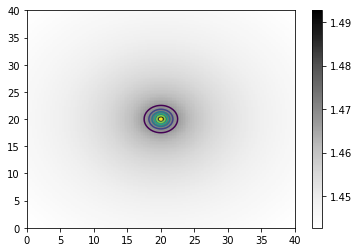

In [1]:
%matplotlib inline

#import sys
#sys.path.insert(0, '/home/phil/philsol_scripts')


import philsol as ps
from philsol.classy import phil_class
#from bokeh.plotting import figure, output_file, show
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import pi

def n_build(rho, x, y):
    
    A0 = 0.01
    n0 = 1.46
    r0 = np.array( np.max(x) /2., np.max(y) /2.)
    dx = r0 - x 
    dy = r0 - y
    R = abs(dx[np.newaxis,:]**2 + dy[:,np.newaxis]**2)**.5
    n = n0 - A0 * np.log(R / rho)
    n[n>1.8] = 1.8
    
    
    return  np.dstack([n for i in range(3)] )


x = np.linspace(0,40,150)
y = np.linspace(0,40,150)
n = n_build(5., x, y)

plt.pcolormesh(x,y,n[:,:,0], cmap ='Greys')
print(n[0,0])
plt.colorbar()



lam = 1.
neigs = 12
dx = x[1] - x[0]
dy = y[1] - y[0]

logfibre = phil_class(n, 2.*pi / lam, dx = dx, dy = dy)
logfibre.build_stuff(matrices = True)
logfibre.solve_stuff(neigs, 2*pi * 2 /lam, extra_fields = True)

E = np.reshape(logfibre.Ex, (logfibre.Eigs, logfibre.num_x, logfibre.num_y))
plt.contour(logfibre.x, logfibre.y, abs(E[0,:,:].transpose()))

print(logfibre.beta * lam /(2.*pi))

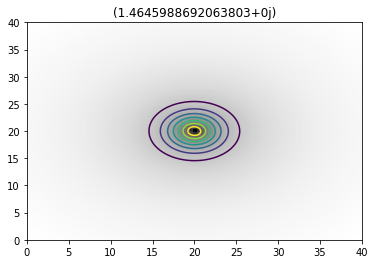

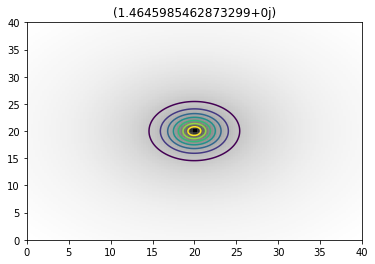

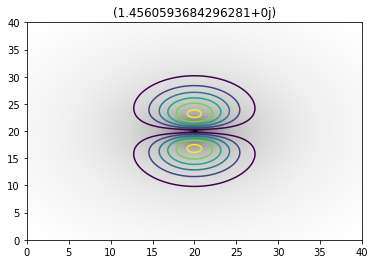

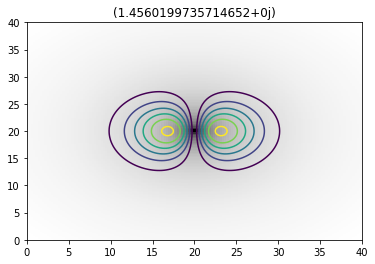

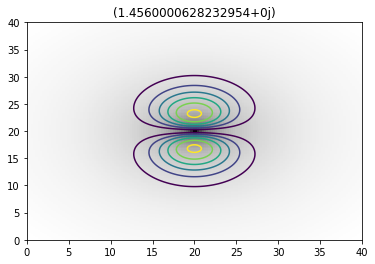

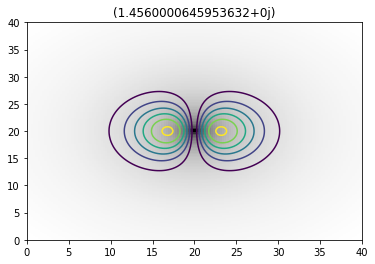

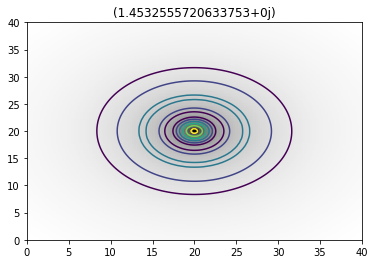

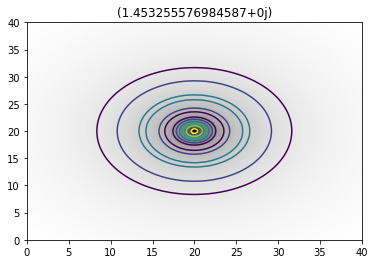

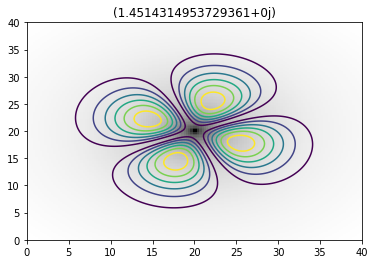

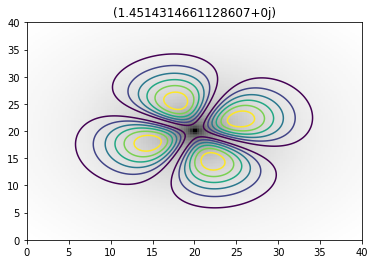

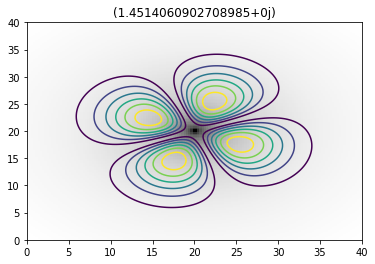

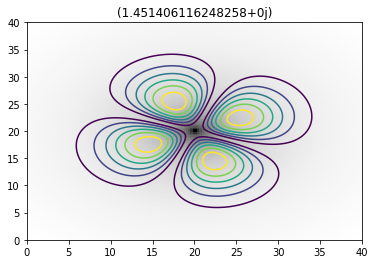

In [7]:

for i in range(logfibre.Eigs):
    plt.figure()
    plt.title(str(logfibre.beta[i] * lam / pi))
    plt.pcolormesh(x,y,n[:,:,0], cmap ='Greys')
    E = np.reshape(logfibre.Ex, (logfibre.Eigs, logfibre.num_x, logfibre.num_y))
    plt.contour(logfibre.x, logfibre.y, abs(E[i,:,:].transpose()))

In [3]:
#Lets sweep the dispersion now

lam_sweep = np.linspace(1.,2.,10)
beta_sweep = []
h_feilds = []
e_feilds = []
for j in range(np.size(lam_sweep)):
    logfibre.k0 = 2.*pi / lam_sweep[j] 
    logfibre.build_stuff(matrices = True)
    logfibre.solve_stuff(neigs, 2*pi * 1.47  / lam_sweep[j], extra_fields = True)
    #print(logfibre.beta * lam /(2.*pi))
    beta_sweep.append(logfibre.beta)
    h_feilds.append(logfibre.H)
    e_feilds.append(logfibre.E)

Assembling matrix for 22500 grid points...

and we are done (after 0.0746316909790039 secs).
Solving eigenmodes on CPU
3.1301138401031494 secs later we have the final solution.
hey fam
Assembling matrix for 22500 grid points...

and we are done (after 0.07114434242248535 secs).
Solving eigenmodes on CPU
2.4128506183624268 secs later we have the final solution.
hey fam
Assembling matrix for 22500 grid points...

and we are done (after 0.06355977058410645 secs).
Solving eigenmodes on CPU
2.5066490173339844 secs later we have the final solution.
hey fam
Assembling matrix for 22500 grid points...

and we are done (after 0.06183576583862305 secs).
Solving eigenmodes on CPU
2.110053777694702 secs later we have the final solution.
hey fam
Assembling matrix for 22500 grid points...

and we are done (after 0.06626152992248535 secs).
Solving eigenmodes on CPU
2.3446667194366455 secs later we have the final solution.
hey fam
Assembling matrix for 22500 grid points...

and we are done (after 0.063

(10, 12)


/home/pbm24/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


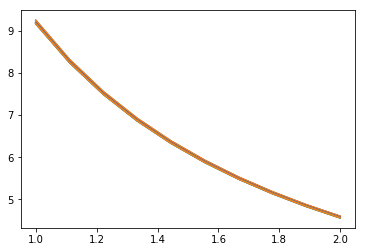

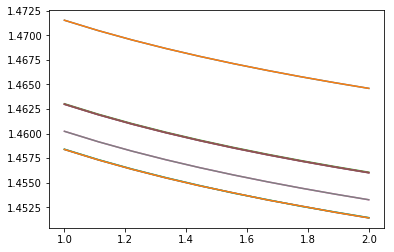

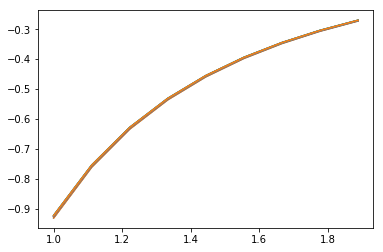

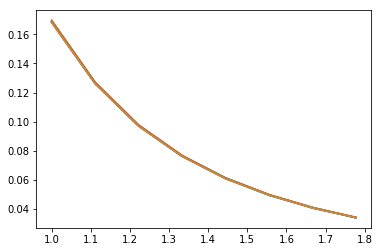

In [4]:
beta = np.array(beta_sweep)
print(np.shape(beta))

plt.figure()
plt.plot(lam_sweep, beta_sweep)

plt.figure()
plt.plot(lam_sweep, beta * lam_sweep[:,np.newaxis] / (2.*pi))



plt.figure()
plt.plot(lam_sweep[:-1], np.diff(beta_sweep, axis = 0, n= 1))

plt.figure()
plt.plot(lam_sweep[:-2], np.diff(beta_sweep, axis = 0, n=2))

